In [148]:
# Import required packages for this project.
from pathlib import Path

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy.stats import anderson
from scipy.stats import ttest_ind
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline

In [149]:
# Established path to access data for this project.
DATA = Path("D:\Masters Of Data Science\ANA 680\Module 1\Assignment 2")

In [150]:
# Load the required data for this project.
CM_df = pd.read_csv(DATA / 'Churn_Modeling.csv', header=0)

# View some initial records.
CM_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [151]:
# Generate data frame dimensions.
CM_df.shape

(10000, 14)

In [152]:
# Generate variable data types.
CM_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [153]:
# Generate number of missing values.
CM_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [154]:
CM_df.describe().map('{:,.3f}'.format)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
mean,"5,000.500","15,690,940.569",650.529,38.922,5.013,"76,485.889",1.530,0.706,0.515,"100,090.240",0.204
std,"2,886.896","71,936.186",96.653,10.488,2.892,"62,397.405",0.582,0.456,0.500,"57,510.493",0.403
min,1.000,"15,565,701.000",350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,"2,500.750","15,628,528.250",584.000,32.000,3.000,0.000,1.000,0.000,0.000,"51,002.110",0.000
50%,"5,000.500","15,690,738.000",652.000,37.000,5.000,"97,198.540",1.000,1.000,1.000,"100,193.915",0.000
75%,"7,500.250","15,753,233.750",718.000,44.000,7.000,"127,644.240",2.000,1.000,1.000,"149,388.247",0.000
max,"10,000.000","15,815,690.000",850.000,92.000,10.000,"250,898.090",4.000,1.000,1.000,"199,992.480",1.000


Exploratory Data Analysis For Relevant Dataset Variables

In [155]:
# Evaluate the 'CustomerId' numeric ID variable uniqueness value count.
CM_df['CustomerId'].nunique()

10000

In [156]:
# Evaluate the 'Surname' string variable uniqueness value count.
CM_df['Surname'].nunique()

2932

In [157]:
# Evaluate the 'Exited' binary categorical target variable value counts.
CM_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

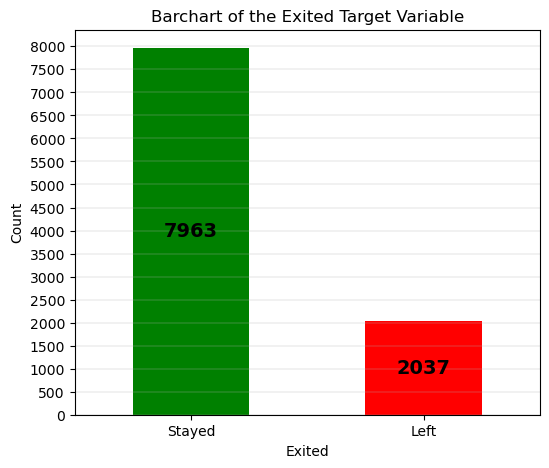

In [158]:
# Barchart for the 'Exited' categorical target variable (Stayed for 0, Left for 1).
dfg = CM_df['Exited'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Exited Target Variable', ylabel='Count', xlabel='Exited', color= ['green', 'red'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Stayed', 'Left'])
plt.yticks(np.arange(0,8001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

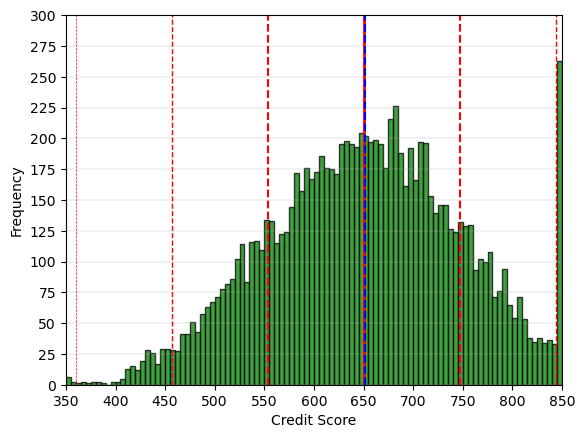

In [159]:
# Histogram for the 'CreditScore' continuous variable.
plt.hist(CM_df['CreditScore'], bins = 100, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.xlim(350, 850)
plt.xticks(np.arange(350,851,step=50))
plt.yticks(np.arange(0,301,step=25))

mean_value = CM_df['CreditScore'].mean()
median_value = CM_df['CreditScore'].median()
std_value = CM_df['CreditScore'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

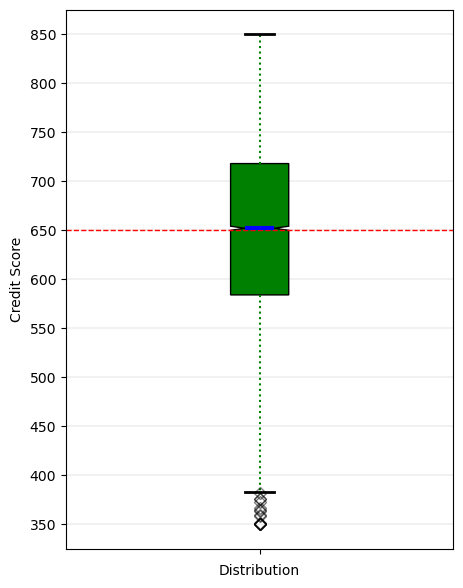

In [160]:
# Boxplot for the 'CreditScore' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(CM_df['CreditScore'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Credit Score')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(350,851,step=50)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [161]:
# 'CreditScore' Anderson-Darling Normality Test
result = anderson(CM_df['CreditScore'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 5.458
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


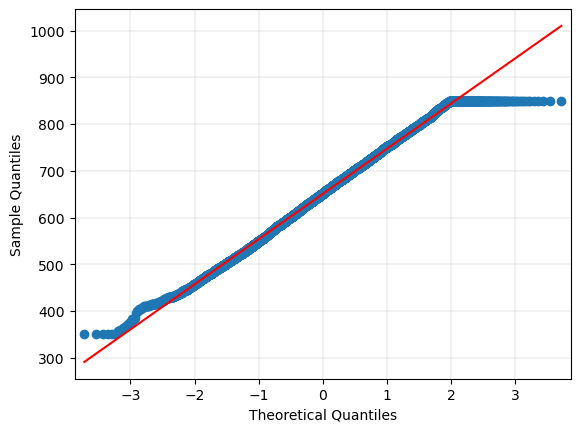

In [162]:
# 'CreditScore' QQ plot
qqplot(CM_df['CreditScore'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [163]:
# 'CreditScore' Skewness & Kurtosis
print(f'Skewness: {skew(CM_df['CreditScore']).round(3)}')
print(f'Kurtosis: {kurtosis(CM_df['CreditScore']).round(3)}')

Skewness: -0.072
Kurtosis: -0.426


In [164]:
# Evaluate the 'Geography' categorical variable value counts.
CM_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

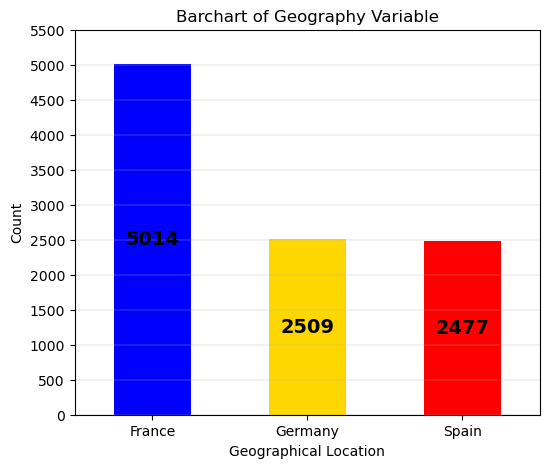

In [165]:
# Barchart for the 'Geography' categorical variable.
dfg = CM_df['Geography'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Geography Variable', ylabel='Count', xlabel='Geographical Location', color= ['blue', 'gold', 'red'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,5501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

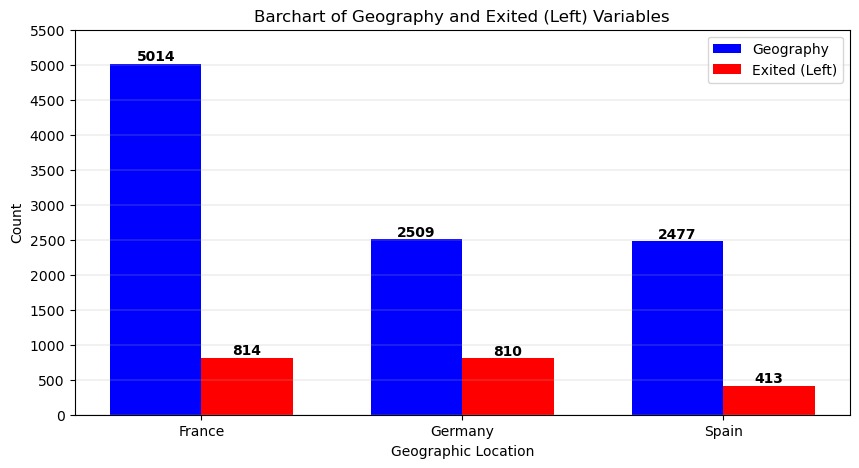

In [166]:
# Barchart for 'Geography' categorical variable with 'Exited' (1: Left).
# Get counts for 'Geography'.
geog_counts = CM_df['Geography'].value_counts()

# Get counts of 'Exited' (1: Left) for each 'Geography' value.
class_left = CM_df[CM_df['Exited'] == 1]['Geography'].value_counts()

# Set up the bar chart.
test_values = ['France', 'Germany', 'Spain'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'Geography' bars (blue).
ax.bar(x - width/2, geog_counts, width, label='Geography', color='blue')
# Plot 'Exited' (1: Left) bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=10, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=10, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Geography and Exited (Left) Variables')
ax.set_xlabel('Geographic Location')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [167]:
# Evaluate the 'Gender' categorical variable value counts.
CM_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

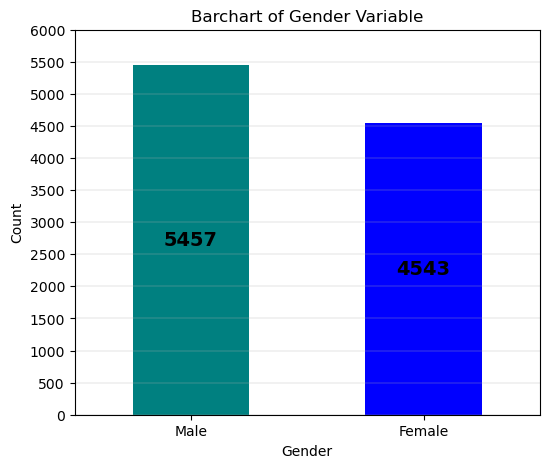

In [168]:
# Barchart for the 'Gender' categorical variable.
dfg = CM_df['Gender'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Gender Variable', ylabel='Count', xlabel='Gender', color= ['teal', 'blue'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14, fontweight='bold')
plt.yticks(np.arange(0,6001,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

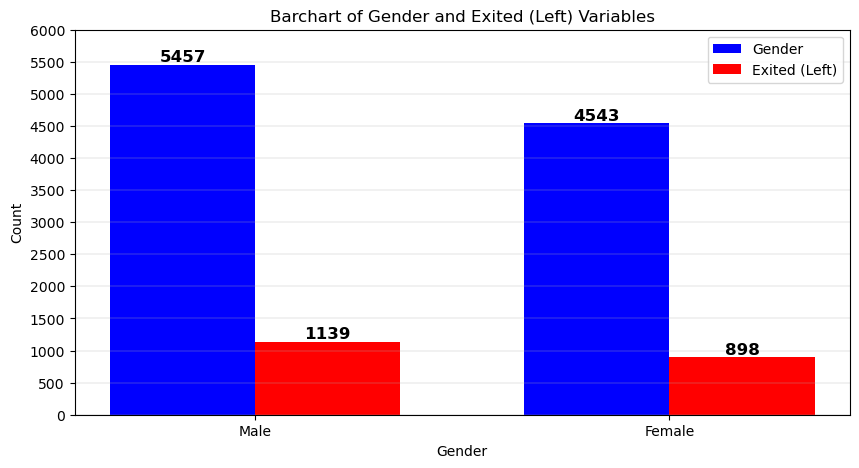

In [169]:
# Barchart for 'Gender' categorical variable with 'Exited' (1: Left).
# Get counts for 'Gender'.
geog_counts = CM_df['Gender'].value_counts()

# Get counts of 'Exited' (1: Left) for each 'Gender' value.
class_left = CM_df[CM_df['Exited'] == 1]['Gender'].value_counts()

# Set up the bar chart.
test_values = ['Male', 'Female'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'Gender' bars (blue).
ax.bar(x - width/2, geog_counts, width, label='Gender', color='blue')
# Plot 'Exited' (1: Left) bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Gender and Exited (Left) Variables')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 6001, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

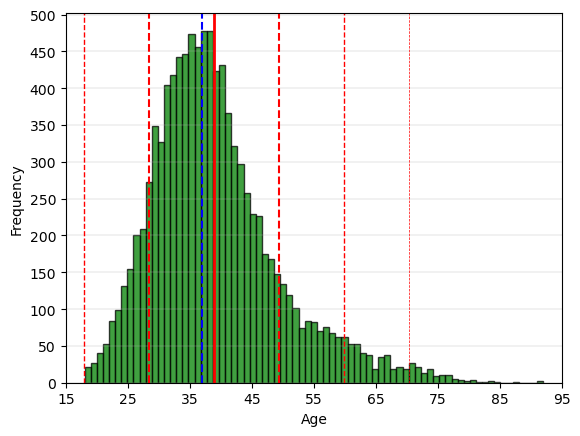

In [170]:
# Histogram for the 'Age' continuous variable.
plt.hist(CM_df['Age'], bins = 75, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(15, 95)
plt.xticks(np.arange(15,96,step=10))
plt.yticks(np.arange(0,501,step=50))

mean_value = CM_df['Age'].mean()
median_value = CM_df['Age'].median()
std_value = CM_df['Age'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

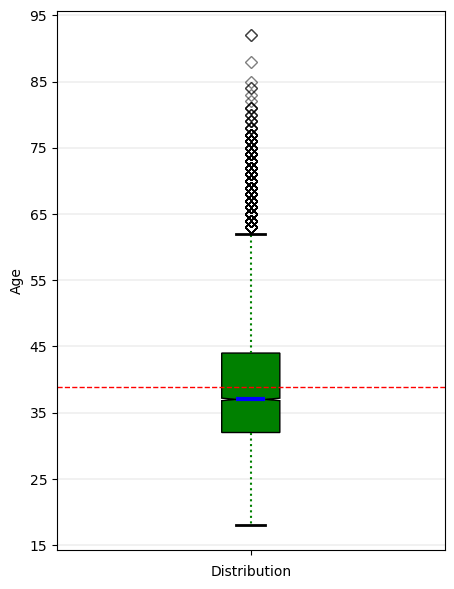

In [171]:
# Boxplot for the 'Age' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(CM_df['Age'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(15,96,step=10)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [172]:
# 'Age' Anderson-Darling Normality Test
result = anderson(CM_df['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 142.194
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


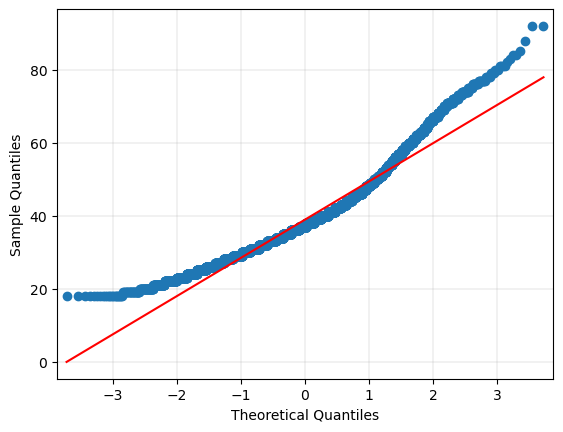

In [173]:
# 'Age' QQ plot
qqplot(CM_df['Age'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [174]:
# 'Age' Skewness & Kurtosis
print(f'Skewness: {skew(CM_df['Age']).round(3)}')
print(f'Kurtosis: {kurtosis(CM_df['Age']).round(3)}')

Skewness: 1.011
Kurtosis: 1.394


In [175]:
# Evaluate the 'Tenure' discrete variable value counts.
CM_df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

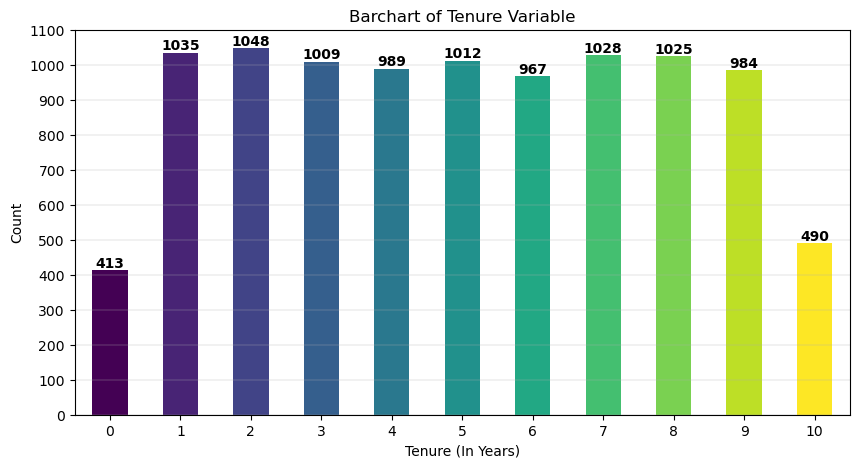

In [176]:
# Barchart for the 'Tenure' discrete variable.
dfg = CM_df['Tenure'].value_counts()
# Create a list of all possible test values (0 to 10) in order.
test_values = [int(i) for i in range(0, 11)]
# Reindex dfg to include all test values (0 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient.
colors = cm.viridis(np.linspace(0, 1, len(test_values)))  # viridis colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Tenure Variable', ylabel='Count', xlabel='Tenure (In Years)', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=10, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 1101, step=100))
plt.grid(axis='y', linewidth=0.25)
plt.show()

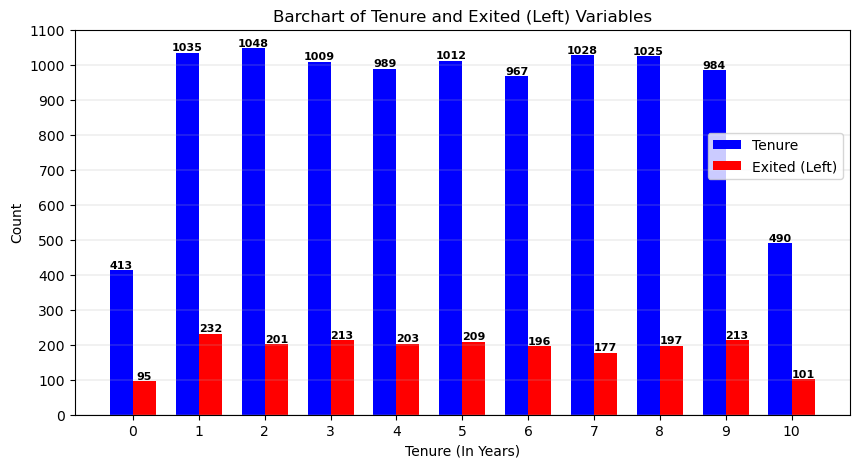

In [177]:
# Barchart for 'Tenure' discrete variable with 'Exited' (1: Left).
# Get counts for 'Tenure'.
year_counts = CM_df['Tenure'].value_counts().reindex(range(0, 11))

# Get counts of 'Exited' (1: Left) for each 'Tenure' value.
class_left = CM_df[CM_df['Exited'] == 1]['Tenure'].value_counts().reindex(range(0, 11))

# Set up the bar chart.
test_values = list(range(0, 11))  # x-axis values 0 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Uniformity of Cell Shape bars (blue).
ax.bar(x - width/2, year_counts, width, label='Tenure', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Tenure and Exited (Left) Variables')
ax.set_xlabel('Tenure (In Years)')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 1101, step=100))
plt.grid(axis='y', linewidth=0.25)
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.75))

plt.show()

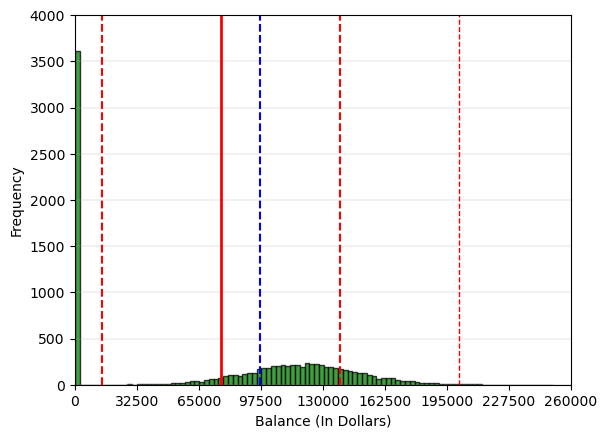

In [178]:
# Histogram for the 'Balance' continuous variable.
plt.hist(CM_df['Balance'], bins = 100, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Balance (In Dollars)')
plt.ylabel('Frequency')
plt.xlim(0, 260000)
plt.xticks(np.arange(0,260001,step=32500))
plt.yticks(np.arange(0,4001,step=500))

mean_value = CM_df['Balance'].mean()
median_value = CM_df['Balance'].median()
std_value = CM_df['Balance'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

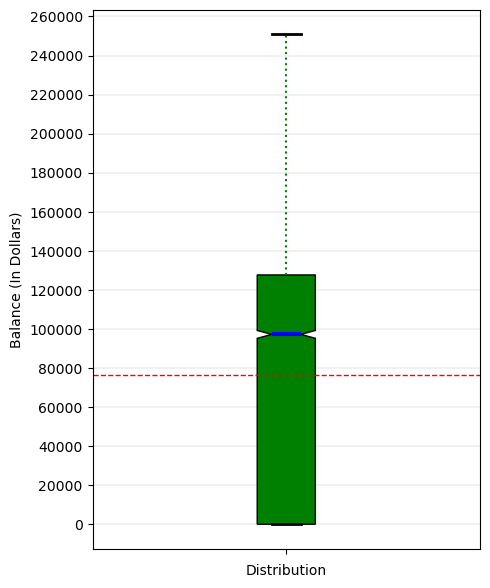

In [179]:
# Boxplot for the 'Balance' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(CM_df['Balance'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Balance (In Dollars)')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,260001,step=20000)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [180]:
# 'Balance' Anderson-Darling Normality Test
result = anderson(CM_df['Balance'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 651.853
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


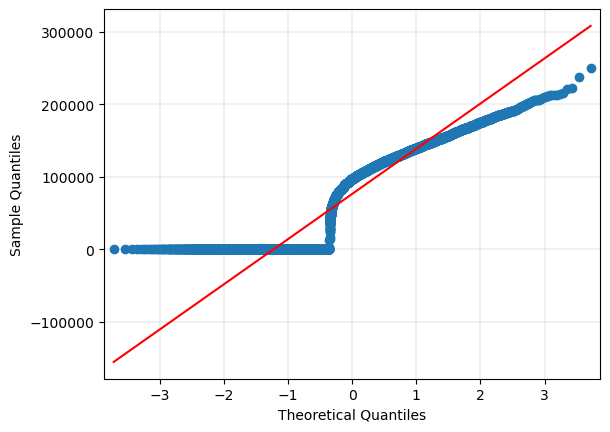

In [181]:
# 'Balance' QQ plot
qqplot(CM_df['Balance'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [182]:
# 'Balance' Skewness & Kurtosis
print(f'Skewness: {skew(CM_df['Balance']).round(3)}')
print(f'Kurtosis: {kurtosis(CM_df['Balance']).round(3)}')

Skewness: -0.141
Kurtosis: -1.489


In [183]:
# Evaluate the 'NumOfProducts' discrete variable value counts.
CM_df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

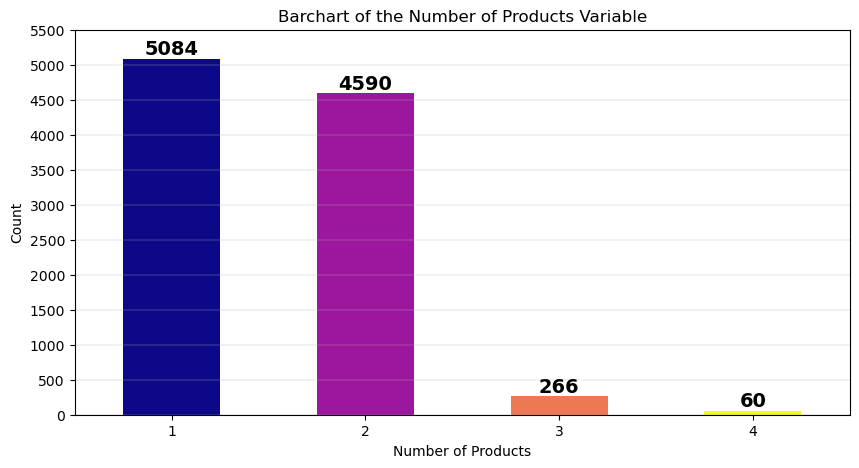

In [184]:
# Barchart for the 'NumOfProducts' discrete variable.
dfg = CM_df['NumOfProducts'].value_counts()
# Create a list of all number of products (1 to 4) in order.
test_values = [int(i) for i in range(1, 5)]
# Reindex dfg to include all number of products (1 to 4).
dfg = dfg.reindex(test_values)

# Create a color gradient.
colors = cm.plasma(np.linspace(0, 1, len(test_values)))  # plasma colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of the Number of Products Variable', ylabel='Count', xlabel='Number of Products', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5501, step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

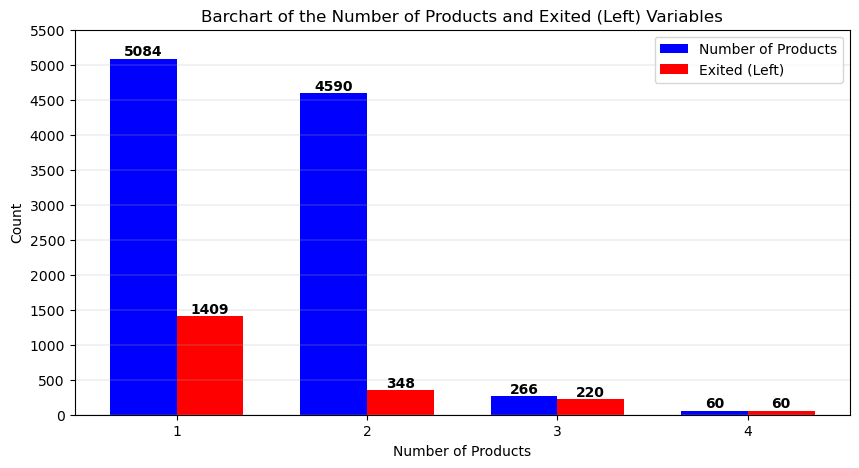

In [185]:
# Barchart for 'NumOfProducts' disrete variable with Exited (1: Left).
# Get counts for 'NumOfProducts'.
prod_counts = CM_df['NumOfProducts'].value_counts().reindex(range(1, 5))

# Get counts of Exited (1: Left) for each 'NumOfProducts' value.
class_left = CM_df[CM_df['Exited'] == 1]['NumOfProducts'].value_counts().reindex(range(1, 5))

# Set up the bar chart.
test_values = list(range(1, 5))  # x-axis values 1 to 4
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'NumOfProducts' bars (blue).
ax.bar(x - width/2, prod_counts, width, label='Number of Products', color='blue')
# Plot Exited (1: Left) bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=10, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=10, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of the Number of Products and Exited (Left) Variables')
ax.set_xlabel('Number of Products')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [186]:
# Evaluate the 'HasCrCard' categorical binary variable value counts (0: No, 1: Yes).
CM_df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

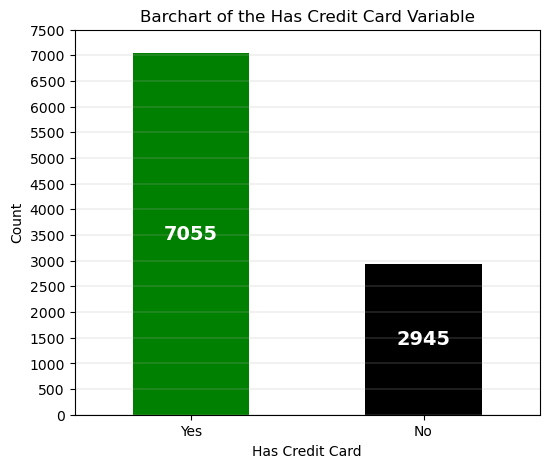

In [187]:
# Barchart for the 'HasCrCard' categorical variable.
dfg = CM_df['HasCrCard'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Has Credit Card Variable', ylabel='Count', xlabel='Has Credit Card', color= ['green', 'black'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14, fontweight='bold')
x_labels = ['Yes', 'No']
plt.xticks(np.unique(CM_df['HasCrCard']), x_labels)
plt.yticks(np.arange(0,7501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

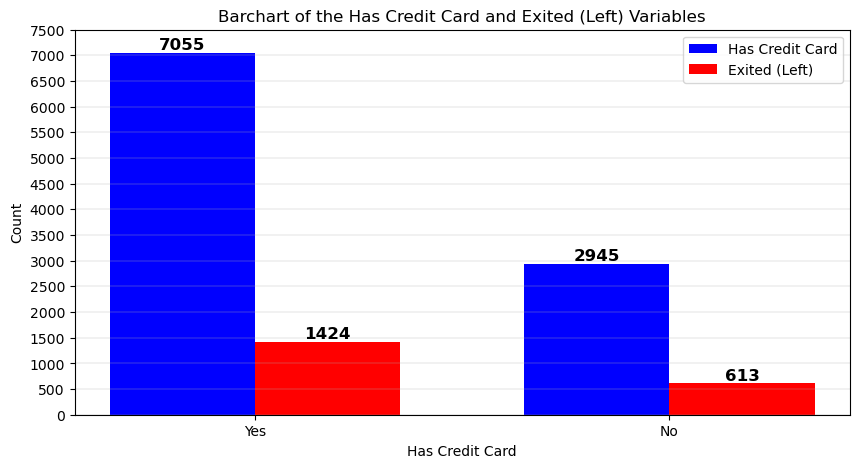

In [188]:
# Barchart for 'HasCrCard' categorical variable with 'Exited' (1: Left).
# Get counts for 'HasCrCard'.
cred_counts = CM_df['HasCrCard'].value_counts()

# Get counts of 'Exited' (1: Left) for each 'HasCrCard' value.
class_left = CM_df[CM_df['Exited'] == 1]['HasCrCard'].value_counts()

# Set up the bar chart.
test_values = ['Yes', 'No'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'HasCrCard' bars (blue).
ax.bar(x - width/2, cred_counts, width, label='Has Credit Card', color='blue')
# Plot 'Exited' (1: Left) bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of the Has Credit Card and Exited (Left) Variables')
ax.set_xlabel('Has Credit Card')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 7501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [189]:
# Evaluate the 'IsActiveMember' categorical binary variable value counts (0: No, 1: Yes).
CM_df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

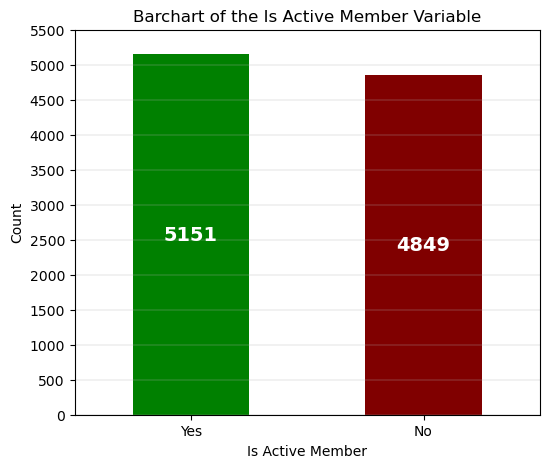

In [190]:
# Barchart for the 'IsActiveMember' categorical variable.
dfg = CM_df['IsActiveMember'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Is Active Member Variable', ylabel='Count', xlabel='Is Active Member', color= ['green', 'maroon'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14, fontweight='bold')
x_labels = ['Yes', 'No']
plt.xticks(np.unique(CM_df['IsActiveMember']), x_labels)
plt.yticks(np.arange(0,5501,step=500))
plt.grid(axis='y', linewidth=0.25)
plt.show()

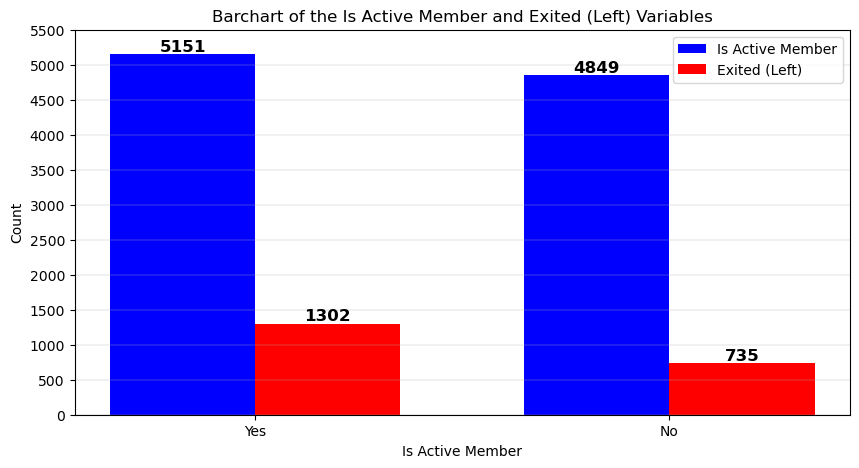

In [191]:
# Barchart for 'IsActiveMember' categorical variable with 'Exited' (1: Left).
# Get counts for 'IsActiveMember'.
active_counts = CM_df['IsActiveMember'].value_counts()

# Get counts of 'Exited' (1: Left) for each 'IsActiveMember' value.
class_left = CM_df[CM_df['Exited'] == 1]['IsActiveMember'].value_counts()

# Set up the bar chart.
test_values = ['Yes', 'No'] # x-axis values
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot 'IsActiveMember' bars (blue).
ax.bar(x - width/2, active_counts, width, label='Is Active Member', color='blue')
# Plot 'Exited' (1: Left) bars (red).
ax.bar(x + width/2, class_left, width, label='Exited (Left)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=12, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=12, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of the Is Active Member and Exited (Left) Variables')
ax.set_xlabel('Is Active Member')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 5501, step=500))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

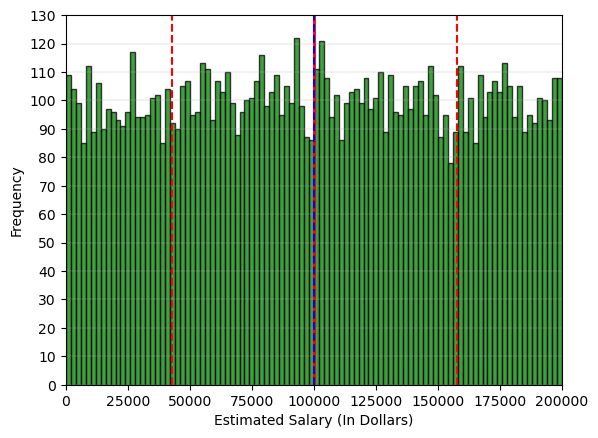

In [192]:
# Histogram for the 'EstimatedSalary' continuous variable.
plt.hist(CM_df['EstimatedSalary'], bins = 100, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Estimated Salary (In Dollars)')
plt.ylabel('Frequency')
plt.xlim(0, 200000)
plt.xticks(np.arange(0,200001,step=25000))
plt.yticks(np.arange(0,131,step=10))

mean_value = CM_df['EstimatedSalary'].mean()
median_value = CM_df['EstimatedSalary'].median()
std_value = CM_df['EstimatedSalary'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

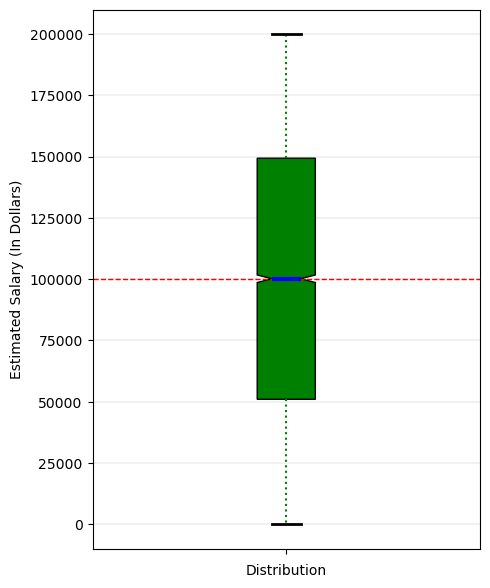

In [193]:
# Boxplot for the 'EstimatedSalary' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(CM_df['EstimatedSalary'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_xlabel('Distribution')
ax.set_ylabel('Estimated Salary (In Dollars)')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0, 200001,step=25000)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [194]:
# 'EstimatedSalary' Anderson-Darling Normality Test
result = anderson(CM_df['EstimatedSalary'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 104.401
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


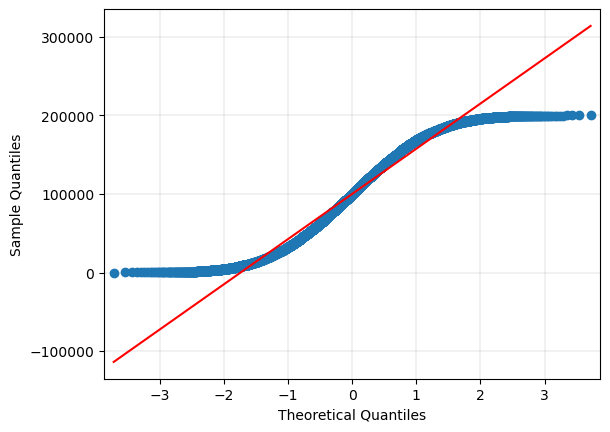

In [195]:
# 'EstimatedSalary' QQ plot
qqplot(CM_df['EstimatedSalary'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [196]:
# 'EstimatedSalary' Skewness & Kurtosis
print(f'Skewness: {skew(CM_df['EstimatedSalary']).round(3)}')
print(f'Kurtosis: {kurtosis(CM_df['EstimatedSalary']).round(3)}')

Skewness: 0.002
Kurtosis: -1.182


Generate correlation matrix associated with the predictor and target variables.

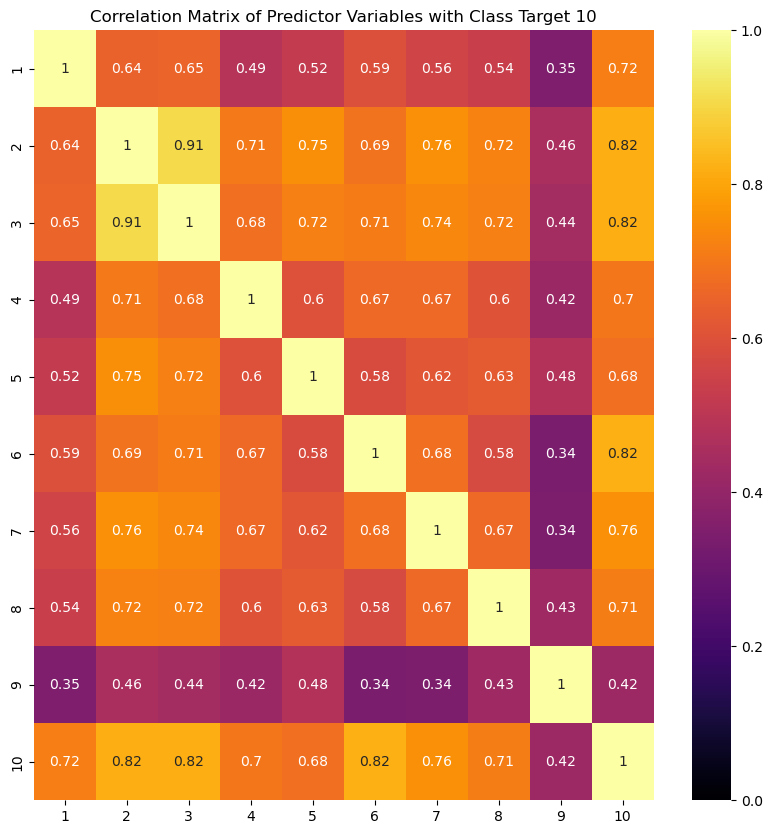

In [ ]:
# Create correlation matrix of predictor variables with Exited target.
# plt.figure(figsize=(10, 10))
# correlation_matrix = CM_df[features].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=0, vmax=1)
# plt.title('Correlation Matrix of Predictor Variables with Exited Target')
# plt.show()